# Exercise

## EDA

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [26]:
data=load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [28]:
data['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
data['target']

array([0, 1, 2, ..., 8, 9, 8])

In [30]:
data['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

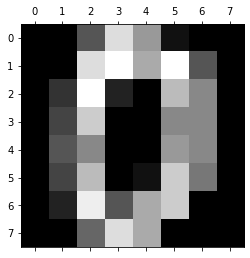

In [34]:
plt.matshow(data['images'][0])
plt.gray()

# Placing all algorithms and parameters in dictionary

In [45]:
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,20,10,30,40,50],
            'kernel':['linear','poly','rbf','sigmoid'],
            'degree':[3,4,5,6,7],
            'cache_size':[200,400,600,800,1000],
            'decision_function_shape':['ovo','ovr']
        }

    },
    'randomforest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10,20,40,50],
            'criterion':['gini', 'entropy', 'log_loss'],
            }
        },
    'logisticregression':{
        'model':LogisticRegression(max_iter=10000),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class':['auto', 'ovr', 'multinomial']
        }
    },
    'gaussianNB':{
        'model':GaussianNB(),
        'params':{}
    },
    'multinomialNB':{
        'model':MultinomialNB(),
        'params':{}
    },
    'decisiontreeclassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'splitter':['best','random']
        }
    }
}

# Training and selecting the best model

In [46]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(data['data'],data['target'])
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

c:\Python\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Python\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Python\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
c:\Python\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not con

In [47]:
scores

[{'model': 'svm',
  'best_score': 0.96884246363355,
  'best_params': {'C': 1,
   'cache_size': 200,
   'decision_function_shape': 'ovo',
   'degree': 3,
   'kernel': 'poly'}},
 {'model': 'randomforest',
  'best_score': 0.9415846487155679,
  'best_params': {'criterion': 'gini', 'n_estimators': 50}},
 {'model': 'logisticregression',
  'best_score': 0.9287898483441659,
  'best_params': {'multi_class': 'ovr',
   'penalty': 'l1',
   'solver': 'liblinear'}},
 {'model': 'gaussianNB', 'best_score': 0.8069281956050759, 'best_params': {}},
 {'model': 'multinomialNB',
  'best_score': 0.8703497369235531,
  'best_params': {}},
 {'model': 'decisiontreeclassifier',
  'best_score': 0.8119328381306097,
  'best_params': {'criterion': 'entropy', 'splitter': 'best'}}]

In [48]:
import pandas as pd
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.968842,"{'C': 1, 'cache_size': 200, 'decision_function..."
1,randomforest,0.941585,"{'criterion': 'gini', 'n_estimators': 50}"
2,logisticregression,0.928790,"{'multi_class': 'ovr', 'penalty': 'l1', 'solve..."
3,gaussianNB,0.806928,{}
4,multinomialNB,0.870350,{}
5,decisiontreeclassifier,0.811933,"{'criterion': 'entropy', 'splitter': 'best'}"


Hence the best model comes out to be Support Vector Machine